In [1]:
from sklearn.preprocessing import Normalizer
normalizer  = Normalizer()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/ma/.bin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/ma/.bin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
from sklearn.model_selection import ShuffleSplit

/home/ma/.bin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
X = data.data
y = data.target

In [8]:
ss = ShuffleSplit(n_splits=1,
                 train_size=0.8,
                 test_size=0.2,
                 random_state=0)
train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [9]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  This is separate from the ipykernel package so we can avoid doing imports until


(-0.05, 0.05)

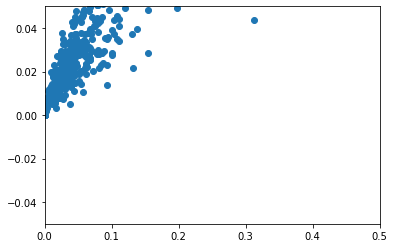

In [11]:
plt.scatter(data.data[:, 6], data.data[:,7])
plt.xlim(0,0.5)
plt.ylim(0,0,5)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  This is separate from the ipykernel package so we can avoid doing imports until


(-0.05, 0.05)

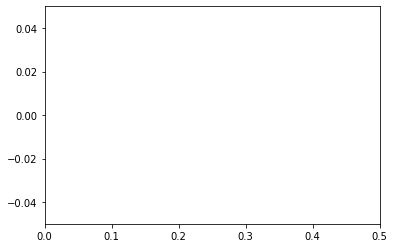

In [13]:

plt.scatter(X[:, 0], X[:,1])
plt.xlim(0,0.5)
plt.ylim(0,0,5)

(0, 0.5)

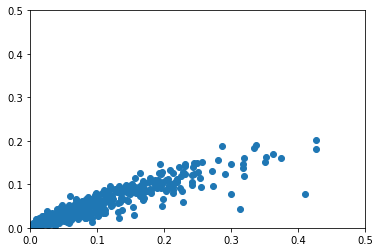

In [14]:
X = data.data[:, [6,7]]
y = data.target
plt.scatter(X[:,0], X[:,1])
plt.xlim(0,0.5)
plt.ylim(0,0.5)

(-0.25, 0.25)

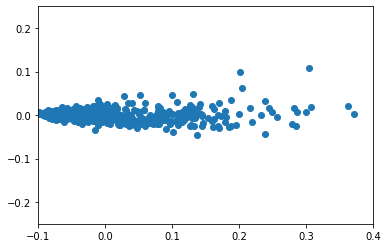

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:,0], X_new[:,1])
plt.xlim(-0.1,0.4)
plt.ylim(-0.25, 0.25)

In [17]:
X_new.mean(axis=0), X_new.std(axis=0)

(array([1.46338712e-18, 3.29262101e-18]), array([0.08751603, 0.01371268]))

(-4, 10)

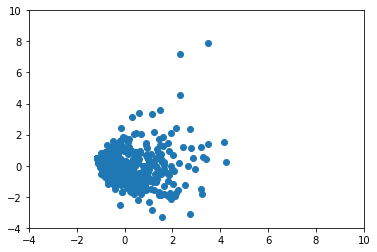

In [20]:
pca = PCA(whiten=True)

pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:,0], X_new[:,1])
plt.xlim(-4,10)
plt.ylim(-4,10)


In [21]:
X_new.mean(axis=0), X_new.std(axis=0)

(array([5.61940652e-17, 2.47409982e-16]), array([0.99912088, 0.99912088]))

## ZCA whitening


(-3, 3)

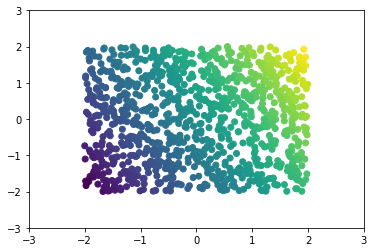

In [39]:
X = np.random.uniform(low=-1, high=1, size=(1000,2))*2
y = 2*X[:,0] + X[:,1]
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)

In [40]:
angle = np.pi/4

In [41]:
R = np.array([[np.sin(angle), -np.cos(angle)],
             [np.cos(angle), np.sin(angle)]])
R

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

(-3, 3)

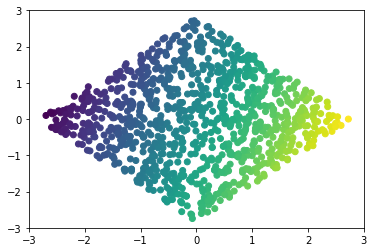

In [42]:
X_rot = X.dot(R)
plt.scatter(X_rot[:,0], X_rot[:,1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)

In [43]:
X = X_rot

Text(0.5, 1.0, 'PCA')

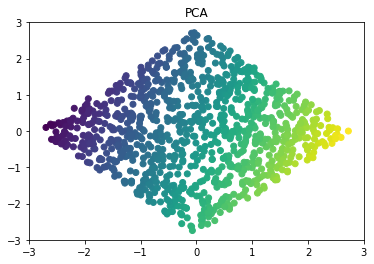

In [44]:
pca = PCA(whiten=False)
pca.fit(X)
X_new = pca.transform(X)

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title("PCA")

Text(0.5, 1.0, 'PCA')

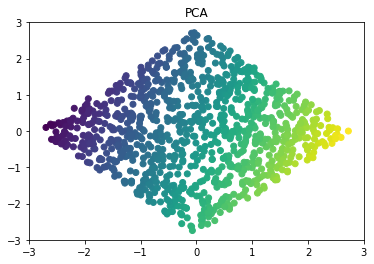

In [45]:

pca = PCA(whiten=True)
pca.fit(X)
X_new = pca.transform(X)

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title("PCA")